In [1]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm_notebook as tqdm


In [6]:
#Make lower resolution files
df['orig_fp'][0]

'/home/rob/HWR/datasets/zooniverse/221812/LowRes0020.jpg'

In [26]:
df = pd.read_csv('../06. Make Fake Labels/box coords.csv', index_col=0)
df['height'] =768
df['width']=1024
df.head()


,catalog_no,id,sx,sy,ex,ey,orig_fp,angle,type,height,width
0,221812,0,61,72,396,195,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,0.148444,NaN,768,1024
1,221812,1,712,171,905,316,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,5.179598,NaN,768,1024
2,221812,2,137,219,611,332,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,2.301214,NaN,768,1024
3,221812,3,693,291,995,443,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,-6.051277,NaN,768,1024
4,221812,4,296,498,810,654,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,-0.057020,QR Code,768,1024


In [10]:
df['faked_fp'] = df['orig_fp'].map(lambda x: x.replace('LowRes','FullFaked')[:-5] + '.jpg')

#for fp in tqdm(df['faked_fp'].drop_duplicates()):
#    if os.path.exists(fp):
#        img = cv2.imread(fp)
#        df.loc[df['faked_fp'] == fp,'width'] = img.shape[1]
#        df.loc[df['faked_fp'] == fp,'height'] = img.shape[0]
#        cv2.imwrite(fp.replace('FullFaked','Fake_LowRes'),cv2.resize(img,(1024,768)))
        
        

In [11]:
def set_type_no(_type):
    if _type == 'QR':
        return 0
    elif _type == 'HWR':
        return 1
    elif _type == 'OCR':
        return 2
    else:
        return 3


df['type_no'] = df['type'].map(set_type_no)
df['label_width'] = (df['ex'] - df['sx'])/df['width']
df['label_height'] = (df['ey'] - df['sy'])/df['height']
df['x'] = (df['ex'] + df['sx'])/2/df['width']
df['y'] = (df['ey'] + df['sy'])/2/df['height']

for name,group in tqdm(df.groupby('faked_fp'),total=len(df['faked_fp'].drop_duplicates())):
    txt_fp = name.replace('jpg','txt')
    group[['type_no','x','y','label_width','label_height']].to_csv(txt_fp,sep = ' ',index=False,header=False)


In [12]:
lowres_df = df.copy()
lowres_df['faked_fp'] = lowres_df['faked_fp'].map(lambda x: x.replace('FullFaked','Fake_LowRes'))
lowres_df['width'] = 1024
lowres_df['height'] = 768
lowres_df['sx'] = lowres_df['width']*df['sx']/df['width']
lowres_df['sy'] = lowres_df['height']*df['sy']/df['height']
lowres_df['ex'] = lowres_df['width']*df['ex']/df['width']
lowres_df['ey'] = lowres_df['height']*df['ey']/df['height']


lowres_df['type_no'] = lowres_df['type'].map(set_type_no)
lowres_df['label_width'] = (lowres_df['ex'] - lowres_df['sx'])/lowres_df['width']
lowres_df['label_height'] = (lowres_df['ey'] - lowres_df['sy'])/lowres_df['height']
lowres_df['x'] = (lowres_df['ex'] + lowres_df['sx'])/2/lowres_df['width']
lowres_df['y'] = (lowres_df['ey'] + lowres_df['sy'])/2/lowres_df['height']

for name,group in tqdm(lowres_df.groupby('faked_fp'),total=len(lowres_df['faked_fp'].drop_duplicates())):
    txt_fp = name.replace('jpg','txt')
    group[['type_no','x','y','label_width','label_height']].to_csv(txt_fp,sep = ' ',index=False,header=False)
lowres_df

,catalog_no,id,sx,sy,ex,ey,orig_fp,angle,type,height,width,type_no,label_width,label_height,x,y,faked_fp
0,221812,0,61.0,72.0,396.0,195.0,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,0.148444,NaN,768,1024,3,0.327148,0.160156,0.223145,0.173828,/home/rob/HWR/datasets/zooniverse/221812/Fake_...
1,221812,1,712.0,171.0,905.0,316.0,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,5.179598,NaN,768,1024,3,0.188477,0.188802,0.789551,0.317057,/home/rob/HWR/datasets/zooniverse/221812/Fake_...
2,221812,2,137.0,219.0,611.0,332.0,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,2.301214,NaN,768,1024,3,0.462891,0.147135,0.365234,0.358724,/home/rob/HWR/datasets/zooniverse/221812/Fake_...
3,221812,3,693.0,291.0,995.0,443.0,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,-6.051277,NaN,768,1024,3,0.294922,0.197917,0.824219,0.477865,/home/rob/HWR/datasets/zooniverse/221812/Fake_...
4,221812,4,296.0,498.0,810.0,654.0,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,-0.057020,QR Code,768,1024,3,0.501953,0.203125,0.540039,0.750000,/home/rob/HWR/datasets/zooniverse/221812/Fake_...
5,221223,0,546.0,293.0,866.0,463.0,/home/rob/HWR/datasets/zooniverse/221223/LowRe...,-8.994814,NaN,768,1024,3,0.312500,0.221354,0.689453,0.492188,/home/rob/HWR/datasets/zooniverse/221223/Fake_...
6,221223,1,194.0,320.0,421.0,442.0,/home/rob/HWR/datasets/zooniverse/221223/LowRe...,-4.114909,NaN,768,1024,3,0.221680,0.158854,0.300293,0.496094,/home/rob/HWR/datasets/zooniverse/221223/Fake_...
7,221223,2,218.0,537.0,743.0,701.0,/home/rob/HWR/datasets/zooniverse/221223/LowRe...,-0.648245,QR Code,768,1024,3,0.512695,0.213542,0.469238,0.805990,/home/rob/HWR/datasets/zooniverse/221223/Fake_...
8,222460,0,473.0,66.0,757.0,192.0,/home/rob/HWR/datasets/zooniverse/222460/LowRe...,2.152996,NaN,768,1024,3,0.277344,0.164062,0.600586,0.167969,/home/rob/HWR/datasets/zooniverse/222460/Fake_...
9,222460,1,529.0,236.0,868.0,375.0,/home/rob/HWR/datasets/zooniverse/222460/LowRe...,-1.080360,NaN,768,1024,3,0.331055,0.180990,0.682129,0.397786,/home/rob/HWR/datasets/zooniverse/222460/Fake_...


In [20]:
act = pd.read_csv('classifications.csv',index_col=0)
act['type_no'] = act['type_no'].map(int)
lowres_df['type_no'] = lowres_df['type'].map(set_type_no)
lowres_df['label_width'] = (lowres_df['ex'] - lowres_df['sx'])/lowres_df['width']
lowres_df['label_height'] = (lowres_df['ey'] - lowres_df['sy'])/lowres_df['height']
lowres_df['x'] = (lowres_df['ex'] + lowres_df['sx'])/2/lowres_df['width']
lowres_df['y'] = (lowres_df['ey'] + lowres_df['sy'])/2/lowres_df['height']

for name,group in tqdm(lowres_df.groupby('orig_fp'),total=len(lowres_df['orig_fp'].drop_duplicates())):
    txt_fp = name.replace('jpg','txt')
    if name in [a.replace('Fake_LowRes','LowRes') for a in act['orig_fp'].values]:
        for name2,row in group.iterrows():
            _type = act[act['label_fp'] == row['orig_fp']]['type_no'].iloc[0]
            group.loc[name2,'type_no'] = _type
        group[['type_no','x','y','label_width','label_height']].to_csv(txt_fp.replace('jpg','txt'),sep = ' ',index=False,header=False)
        print(group)
    #group[['type_no','x','y','label_width','label_height']].to_csv(txt_fp,sep = ' ',index=False,header=False)
    


In [25]:
lowres_df

,catalog_no,id,sx,sy,ex,ey,orig_fp,angle,type,height,width,type_no,label_width,label_height,x,y,faked_fp
0,221812,0,61.0,72.0,396.0,195.0,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,0.148444,NaN,768,1024,3,0.327148,0.160156,0.223145,0.173828,/home/rob/HWR/datasets/zooniverse/221812/Fake_...
1,221812,1,712.0,171.0,905.0,316.0,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,5.179598,NaN,768,1024,3,0.188477,0.188802,0.789551,0.317057,/home/rob/HWR/datasets/zooniverse/221812/Fake_...
2,221812,2,137.0,219.0,611.0,332.0,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,2.301214,NaN,768,1024,3,0.462891,0.147135,0.365234,0.358724,/home/rob/HWR/datasets/zooniverse/221812/Fake_...
3,221812,3,693.0,291.0,995.0,443.0,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,-6.051277,NaN,768,1024,3,0.294922,0.197917,0.824219,0.477865,/home/rob/HWR/datasets/zooniverse/221812/Fake_...
4,221812,4,296.0,498.0,810.0,654.0,/home/rob/HWR/datasets/zooniverse/221812/LowRe...,-0.057020,QR Code,768,1024,3,0.501953,0.203125,0.540039,0.750000,/home/rob/HWR/datasets/zooniverse/221812/Fake_...
5,221223,0,546.0,293.0,866.0,463.0,/home/rob/HWR/datasets/zooniverse/221223/LowRe...,-8.994814,NaN,768,1024,3,0.312500,0.221354,0.689453,0.492188,/home/rob/HWR/datasets/zooniverse/221223/Fake_...
6,221223,1,194.0,320.0,421.0,442.0,/home/rob/HWR/datasets/zooniverse/221223/LowRe...,-4.114909,NaN,768,1024,3,0.221680,0.158854,0.300293,0.496094,/home/rob/HWR/datasets/zooniverse/221223/Fake_...
7,221223,2,218.0,537.0,743.0,701.0,/home/rob/HWR/datasets/zooniverse/221223/LowRe...,-0.648245,QR Code,768,1024,3,0.512695,0.213542,0.469238,0.805990,/home/rob/HWR/datasets/zooniverse/221223/Fake_...
8,222460,0,473.0,66.0,757.0,192.0,/home/rob/HWR/datasets/zooniverse/222460/LowRe...,2.152996,NaN,768,1024,3,0.277344,0.164062,0.600586,0.167969,/home/rob/HWR/datasets/zooniverse/222460/Fake_...
9,222460,1,529.0,236.0,868.0,375.0,/home/rob/HWR/datasets/zooniverse/222460/LowRe...,-1.080360,NaN,768,1024,3,0.331055,0.180990,0.682129,0.397786,/home/rob/HWR/datasets/zooniverse/222460/Fake_...


In [23]:
act

,orig_fp,label_fp,_type,type_no
0,/home/rob/HWR/datasets/zooniverse/219414/Fake_...,/home/rob/HWR/datasets/zooniverse/219414/Label...,q,0
1,/home/rob/HWR/datasets/zooniverse/219414/Fake_...,/home/rob/HWR/datasets/zooniverse/219414/Label...,h,1
2,/home/rob/HWR/datasets/zooniverse/221652/Fake_...,/home/rob/HWR/datasets/zooniverse/221652/Label...,o,2
3,/home/rob/HWR/datasets/zooniverse/221652/Fake_...,/home/rob/HWR/datasets/zooniverse/221652/Label...,q,0
4,/home/rob/HWR/datasets/zooniverse/221652/Fake_...,/home/rob/HWR/datasets/zooniverse/221652/Label...,h,1
5,/home/rob/HWR/datasets/zooniverse/219858/Fake_...,/home/rob/HWR/datasets/zooniverse/219858/Label...,q,0
6,/home/rob/HWR/datasets/zooniverse/219858/Fake_...,/home/rob/HWR/datasets/zooniverse/219858/Label...,h,1
11,/home/rob/HWR/datasets/zooniverse/222919/Fake_...,/home/rob/HWR/datasets/zooniverse/222919/Label...,q,0
12,/home/rob/HWR/datasets/zooniverse/222919/Fake_...,/home/rob/HWR/datasets/zooniverse/222919/Label...,h,1
13,/home/rob/HWR/datasets/zooniverse/219777/Fake_...,/home/rob/HWR/datasets/zooniverse/219777/Label...,q,0


In [22]:
lowres_df.loc[0,'orig_fp'],[a.replace('Fake_LowRes','LowRes') for a in act['orig_fp'].values]

('/home/rob/HWR/datasets/zooniverse/221812/LowRes0020.jpg',
 ['/home/rob/HWR/datasets/zooniverse/219414/LowRes002.jpg',
  '/home/rob/HWR/datasets/zooniverse/219414/LowRes002.jpg',
  '/home/rob/HWR/datasets/zooniverse/221652/LowRes002.jpg',
  '/home/rob/HWR/datasets/zooniverse/221652/LowRes002.jpg',
  '/home/rob/HWR/datasets/zooniverse/221652/LowRes002.jpg',
  '/home/rob/HWR/datasets/zooniverse/219858/LowRes002.jpg',
  '/home/rob/HWR/datasets/zooniverse/219858/LowRes002.jpg',
  '/home/rob/HWR/datasets/zooniverse/222919/LowRes002.jpg',
  '/home/rob/HWR/datasets/zooniverse/222919/LowRes002.jpg',
  '/home/rob/HWR/datasets/zooniverse/219777/LowRes002.jpg',
  '/home/rob/HWR/datasets/zooniverse/219777/LowRes002.jpg',
  '/home/rob/HWR/datasets/zooniverse/219777/LowRes002.jpg',
  '/home/rob/HWR/datasets/zooniverse/219777/LowRes002.jpg',
  '/home/rob/HWR/datasets/Aarhus/NHMA-ENT-199094-FullFaked.jpg',
  '/home/rob/HWR/datasets/Aarhus/NHMA-ENT-199094-FullFaked.jpg',
  '/home/rob/HWR/datasets/zoon

In [16]:
a = act[act['orig_fp'].map(lambda x: 'zooniverse' in x)]
a = a['orig_fp'].drop_duplicates().map(lambda x: x.replace('Fake_LowRes','Preview'))
a.to_csv('zooniverse_to_be_yolod.txt',index=False)

In [16]:
for name,row in act.iterrows():
    if 'zooniverse' in row['orig_fp']:
        print(row['orig_fp'])
        break

/home/rob/HWR/datasets/zooniverse/219414/Fake_LowRes002.jpg


In [9]:
for name,row in lowres_df.iterrows():
    fp = row['orig_fp'].replace('Label','Fake_LowRes')[:-5] + '.jpg'
    if not os.path.exists(fp):
        txt_fp = fp.replace('jpg','txt')
        #os.remove(txt_fp)
        print(fp)

In [10]:
#Train, valid, test, split
fps = glob('/home/rob/HWR/datasets/zooniverse/*/Fake_LowRes*.jpg')
np.random.seed(42)
fps = np.random.permutation(fps)
#60,20,20
train = fps[:int(len(fps)*0.7)]
val = fps[int(len(fps)*0.7):]
#test = fps[int(len(fps)*0.8):]
np.savetxt('train_zooniverse.txt',train,fmt='%s',delimiter='\n')
np.savetxt('val_zooniverse.txt',val,fmt='%s',delimiter='\n')

In [2]:

fps[:10]

['/home/rob/HWR/datasets/zooniverse/221812/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/221223/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/222460/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/220139/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/220398/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/222592/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/220499/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/221556/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/222402/Cropped002.jpg',
 '/home/rob/HWR/datasets/zooniverse/220996/Cropped002.jpg']

In [39]:
fp = '/home/rob/HWR/datasets/IAM/ascii/words.txt'
i = 0
lines = []
for line in open(fp,'r'):
    line = line.split(' ')
    line = ' '.join(line[:9]) + ''.join(line[9:])
    lines+=[line.split('\n')[0].split(' ')]


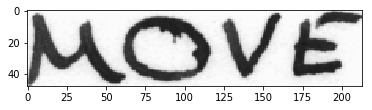

In [52]:
fp = '/home/rob/HWR/datasets/IAM/forms/a01-000u.png'
img = cv2.imread(fp)
x = 507
y = 766
w = 213
h = 48
plt.imshow(img[y:y+h,x:x+w])


In [56]:
cols = ['word_id','ok?','th','x','y','w','h','pos','word']
df = pd.DataFrame(lines[18:],columns = cols)
df['x'] = df['x'].map(int)
df['y'] = df['y'].map(int)
df['w'] = df['w'].map(int)
df['h'] = df['h'].map(int)

df['form_img'] = df['word_id'].map(lambda x: '-'.join(x.split('-')[:2]) + '.png')
df['x'] = df['x']+df['w']//2
df['x'] = df['x']/
df['y'] = df['y'] + df['h']//2
df['y'] = df['y'] + df['h']//2
df['class'] = 0

In [ ]:
df[]

In [64]:

for name,group in tqdm(df.groupby('form_img'),total=len(df['form_img'].drop_duplicates())):
    img = cv2.imread('/home/rob/HWR/datasets/IAM/forms/'+name)
    height,width = img.shape[:2]
    group['x'] = group['x']/width
    group['y'] = group['y']/height
    group['w'] = group['w']/width
    group['h'] = group['h']/height
    group = group[['class','x','y','w','h']]
    group.to_csv('/home/rob/HWR/datasets/IAM/forms/'+name.replace('png','txt'),sep=' ',index=False)
    if (group['x'].max() > 1) | (group['y'].max() > 1) |(group['w'].max() > 1) |(group['h'].max() > 1):
        print('wtf')
        break

  0%|          | 0/1539 [00:00<?, ?it/s]/home/rob/anaconda3/envs/hwrtf/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/rob/anaconda3/envs/hwrtf/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/rob/anaconda3/envs/hwrtf/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [61]:
pd.read_csv('/home/rob/HWR/datasets/IAM/forms/'+name.replace('png','txt'),sep=' ')


,class,x,y,w,h
0,0,0.169827,0.223885,0.010891,0.014399
1,0,0.247277,0.223038,0.085922,0.013552
2,0,0.335216,0.222756,0.028237,0.014116
3,0,0.404195,0.224732,0.066962,0.022021
4,0,0.503429,0.221344,0.050827,0.017222
5,0,0.657120,0.220779,0.154094,0.020610
6,0,0.799516,0.223885,0.069786,0.020327
7,0,0.248084,0.277244,0.177894,0.028233
8,0,0.392900,0.281479,0.059298,0.022304
9,0,0.490520,0.276398,0.083905,0.011858


In [74]:
#split into train and test
fps = glob('/home/rob/HWR/datasets/IAM/forms/*.png')
np.random.seed(42)
fps = np.random.permutation(fps)
percent_test = 20
num_train = len(fps)*(100-percent_test)
train = fps[:num_train]
test = fps[num_train:]
file_train = open('/home/rob/HWR/darknet/train.txt','w')
file_test = open('/home/rob/HWR/darknet/test.txt','w')
for line in train:
    file_train.write(line+'\n')
for line in test:
    file_test.write(line+'\n')

In [76]:
with open('/home/rob/HWR/darknet/train.txt','r') as f:
    for line in f:
        print('dfasdf',line)
        if '5' in line:
            break

dfasdf /home/rob/HWR/datasets/IAM/forms/d04-071.png

dfasdf /home/rob/HWR/datasets/IAM/forms/l07-190.png

dfasdf /home/rob/HWR/datasets/IAM/forms/g07-030.png

dfasdf /home/rob/HWR/datasets/IAM/forms/d04-012.png

dfasdf /home/rob/HWR/datasets/IAM/forms/g07-010b.png

dfasdf /home/rob/HWR/datasets/IAM/forms/f07-000b.png

dfasdf /home/rob/HWR/datasets/IAM/forms/a03-020.png

dfasdf /home/rob/HWR/datasets/IAM/forms/e07-072.png

dfasdf /home/rob/HWR/datasets/IAM/forms/a01-113u.png

dfasdf /home/rob/HWR/datasets/IAM/forms/r02-146.png

dfasdf /home/rob/HWR/datasets/IAM/forms/e07-086.png

dfasdf /home/rob/HWR/datasets/IAM/forms/c02-012.png

dfasdf /home/rob/HWR/datasets/IAM/forms/l01-023.png

dfasdf /home/rob/HWR/datasets/IAM/forms/e06-021.png

dfasdf /home/rob/HWR/datasets/IAM/forms/a02-037.png

dfasdf /home/rob/HWR/datasets/IAM/forms/m04-231.png

dfasdf /home/rob/HWR/datasets/IAM/forms/n04-149.png

dfasdf /home/rob/HWR/datasets/IAM/forms/f03-169.png

dfasdf /home/rob/HWR/datasets/IAM/forms/m04